<a href="https://colab.research.google.com/github/JosemarBrito/Agenda/blob/master/Pandas_com_excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalhando com Planilhas do Excel**

In [12]:
#Importando biblioteca
import pandas as pd

In [13]:
#Leitura de arquivos
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')


In [14]:
#Consulta idividual
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [15]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [16]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [17]:
#Exibindo as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [18]:
#Exibindo linhas aleatórias
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
39,Aracaju,2018-01-01,11.11,1522,8
98,Fortaleza,2019-01-01,15.00,1005,2
36,Natal,2019-02-09,328.00,853,2
18,Salvador,2019-01-01,242.31,1035,1
163,Salvador,2019-01-02,17.66,1036,3


In [19]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [20]:
#Alterar tipo de dados de cada coluna (opcional)
df['LojaID'] = df['LojaID'].astype('object')

In [21]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

tratando valores faltantes

In [22]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [23]:
#substituir pela media de vendas
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [24]:
#Substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [25]:
#apagando as linhas com valores nulos
df.dropna(inplace=True)

In [26]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [27]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

# **Criando novas colunas**

In [29]:
#Criando a coluna de receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [30]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [32]:
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [33]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [34]:
#Retornando a maior receita
df['Receita'].max()

3544.0

In [35]:
#Retornado a menor receita
df['Receita'].min()

3.34

In [36]:
#nlargest
df.nlargest(5, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


In [37]:
#nsmallest
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [38]:
#Agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [39]:
#Ordenando conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# **Trabalhando com Datas**


In [102]:
#Tranformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [103]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade                      object
Data                         int64
Vendas                     float64
LojaID                      object
Qtde                         int64
Receita                    float64
Receita/Vendas             float64
Ano_Venda                    int64
mes_venda                    int64
dia_venda                    int64
diferenca_dias     timedelta64[ns]
trimestre_venda              int64
dtype: object

In [104]:
#Transformando coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [105]:
df.dtypes

Cidade                      object
Data                datetime64[ns]
Vendas                     float64
LojaID                      object
Qtde                         int64
Receita                    float64
Receita/Vendas             float64
Ano_Venda                    int64
mes_venda                    int64
dia_venda                    int64
diferenca_dias     timedelta64[ns]
trimestre_venda              int64
dtype: object

In [106]:
#Agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [107]:
#Criando uma nova coluna com ano
df['Ano_Venda'] = df['Data'].dt.year

In [108]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
20,Fortaleza,2019-01-01,39.68,1003,2,79.36,2.0,2019,1,1,365 days,1
76,Salvador,2019-01-01,39.51,1035,3,118.53,3.0,2019,1,1,365 days,1
21,Aracaju,2018-01-01,37.36,1520,2,74.72,2.0,2018,1,1,0 days,1
112,Aracaju,2018-01-01,4.52,1522,8,36.16,8.0,2018,1,1,0 days,1
20,Aracaju,2018-01-01,39.86,1522,9,358.74,9.0,2018,1,1,0 days,1


In [109]:
#Extraindo o mes e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [110]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
199,Natal,2019-01-02,153.87,1036,3,461.61,3.0,2019,1,2,366 days,1
50,Aracaju,2018-01-01,7.52,1522,5,37.60,5.0,2018,1,1,0 days,1
123,Recife,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
9,Salvador,2019-01-01,127.92,1036,1,127.92,1.0,2019,1,1,365 days,1
17,Aracaju,2018-01-01,162.19,1522,9,1459.71,9.0,2018,1,1,0 days,1


In [111]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [112]:
#Calculando a diferença de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [113]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
21,Aracaju,2018-01-01,37.36,1520,2,74.72,2.0,2018,1,1,0 days,1
147,Natal,2019-01-02,34.50,1035,1,34.50,1.0,2019,1,2,366 days,1
12,Aracaju,2019-01-01,9.78,1520,8,78.24,8.0,2019,1,1,365 days,1
26,Aracaju,2018-01-01,6.98,1521,10,69.80,10.0,2018,1,1,0 days,1
54,Natal,2018-10-03,373.00,852,4,1492.00,4.0,2018,10,3,275 days,4


In [114]:
#Criando coluna de trimestre
df['trimestre_venda'] = df['Data'].dt.quarter

In [115]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
27,Salvador,2019-01-01,145.79,1034,1,145.79,1.0,2019,1,1,365 days,1
185,Natal,2019-01-02,6.67,1036,1,6.67,1.0,2019,1,2,366 days,1
104,Recife,2019-01-01,40.11,983,5,200.55,5.0,2019,1,1,365 days,1
69,Fortaleza,2019-01-01,216.65,1003,6,1299.90,6.0,2019,1,1,365 days,1
188,Salvador,2019-01-02,178.11,1035,3,534.33,3.0,2019,1,2,366 days,1


In [116]:
#Filtrando as vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [117]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# **Visualização de Dados**

In [118]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

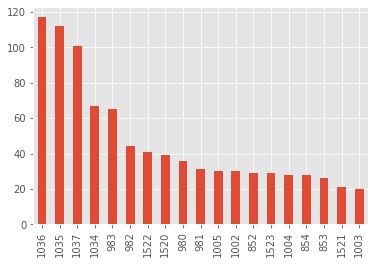

In [119]:
#Grafico de Barras
df['LojaID'].value_counts(ascending=False).plot.bar()

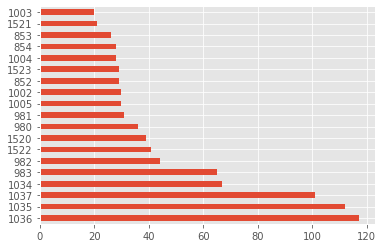

In [120]:
#grafico de barras Horizontais
df['LojaID'].value_counts().plot.barh()

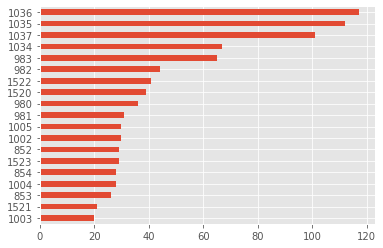

In [121]:
#Grafico de barras Horizontais do maior para o menor
df['LojaID'].value_counts(ascending=True).plot.barh();

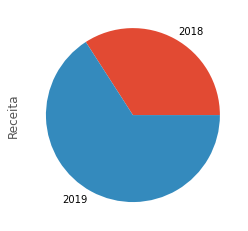

In [122]:
#Grafico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [123]:
#Total de Vendas por Cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

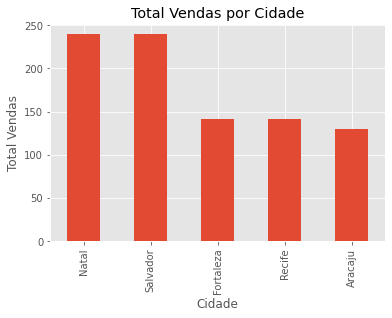

In [124]:
import matplotlib
#Adicionando um Titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

Text(0, 0.5, 'Total Vendas')

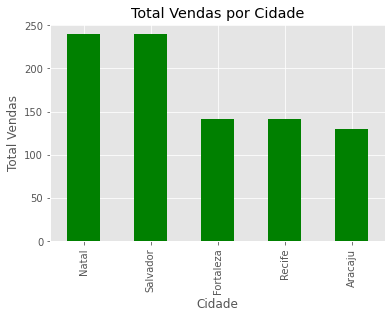

In [125]:
#Alterando a Cor
df['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade', color='green')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

In [126]:
#Alterando o Estilo do Grafico (Ver modelos na documentação da matplotlib )
plt.style.use('ggplot')

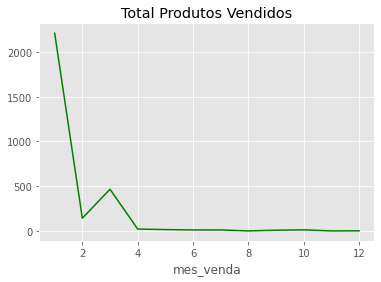

In [132]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = 'Total Produtos Vendidos', color = 'green')

In [128]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [133]:
#Selecionando as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

In [138]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

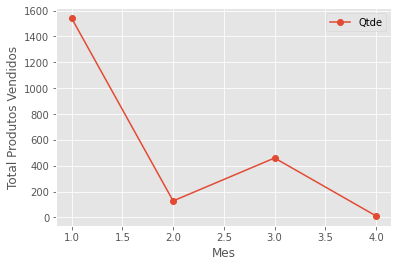

In [143]:
#Total de produtos vendidos por mês
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mes')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

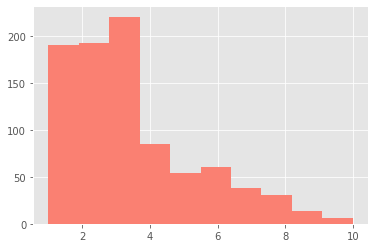

In [147]:
#Histograma
plt.hist(df['Qtde'], color='salmon');

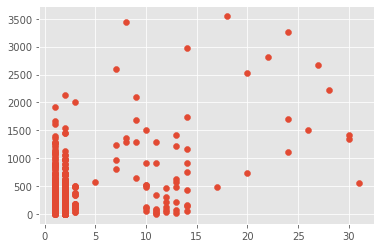

In [149]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita']);

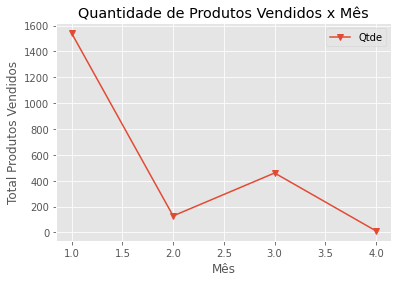

In [152]:
#salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.title('Quantidade de Produtos Vendidos x Mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()
plt.savefig('grafico QTDE x MES.png')